## Count Bar Plot

<class 'matplotlib.axes._axes.Axes'>


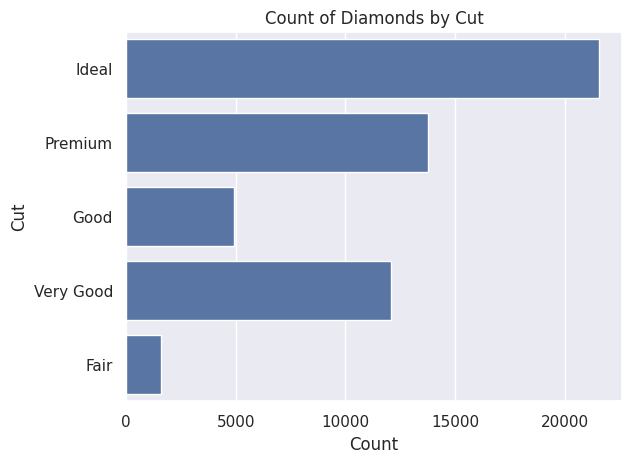

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

diamonds = pd.read_csv("../00_datasets/diamonds.csv")

# sns.countplot(y=diamonds['cut']) # Create count plot with region on the y-axis
g = sns.countplot(y='cut', data=diamonds) # same as above

g.set_title("Count of Diamonds by Cut")
g.set(xlabel="Count", ylabel="Cut")

print(type(g))
plt.show()

## Scatter plot with customized hue

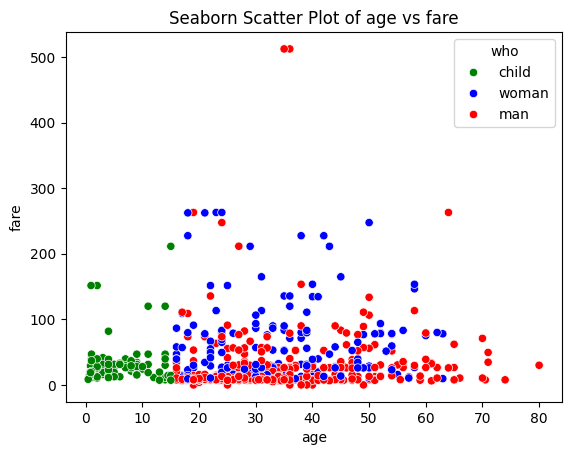

In [ ]:
titanic = pd.read_csv("../00_datasets/titanic.csv")
titanic.dropna(subset=['age'], inplace=True)  # Drop rows with NaN in 'age'

# Seaborn Scatter Plot
palette_colors = {"child": "green", "woman": "blue", "man": 'red'}
sns.scatterplot(x='age', y='fare', data=titanic, 
                hue='who',
                hue_order=['child', 'woman', 'man'],
                palette=palette_colors,
                )
plt.title('Seaborn Scatter Plot of age vs fare')
plt.show()


# Relational plots (Sub plots)

- For numeric data only
- Scatter and Line Plot exists here
- It return's FacetGrid type

`It could also be implemented using Facet. if col or row param is used`

## Scatter Plot

<class 'seaborn.axisgrid.FacetGrid'>


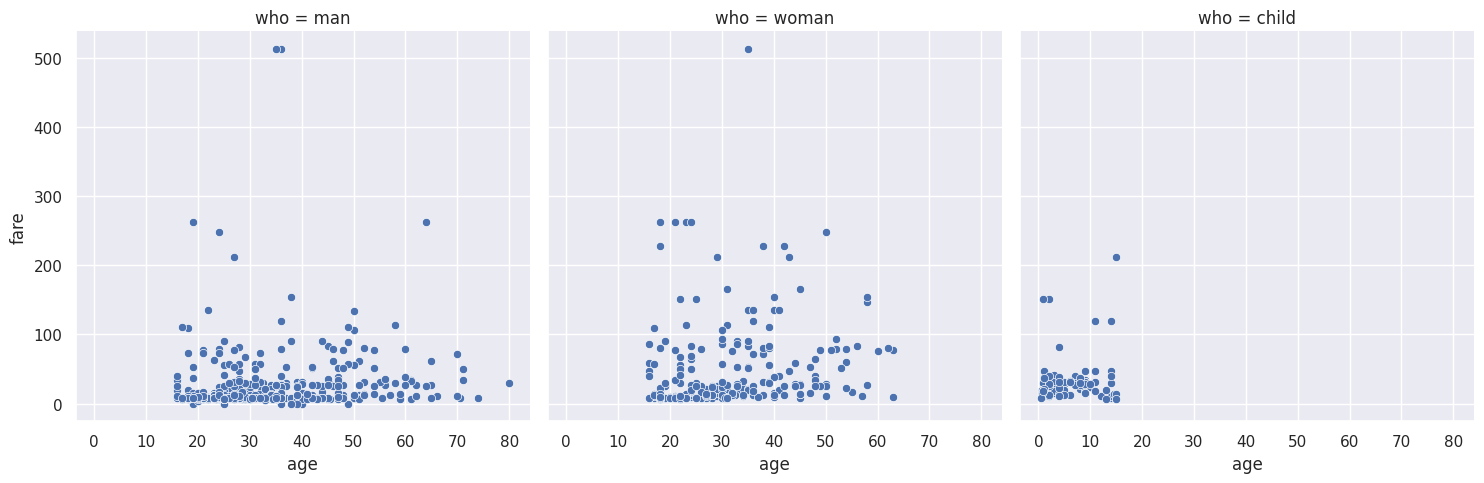

In [ ]:
g = sns.relplot(x='age', y='fare', 
            data=titanic, 
            kind='scatter',
            col='who', # Create separate plots for each 'who' category
            # row='who', # It will arrange plots in a row
            )

print(type(g)) # <class 'seaborn.axisgrid.FacetGrid'>

# Show plot
plt.show()

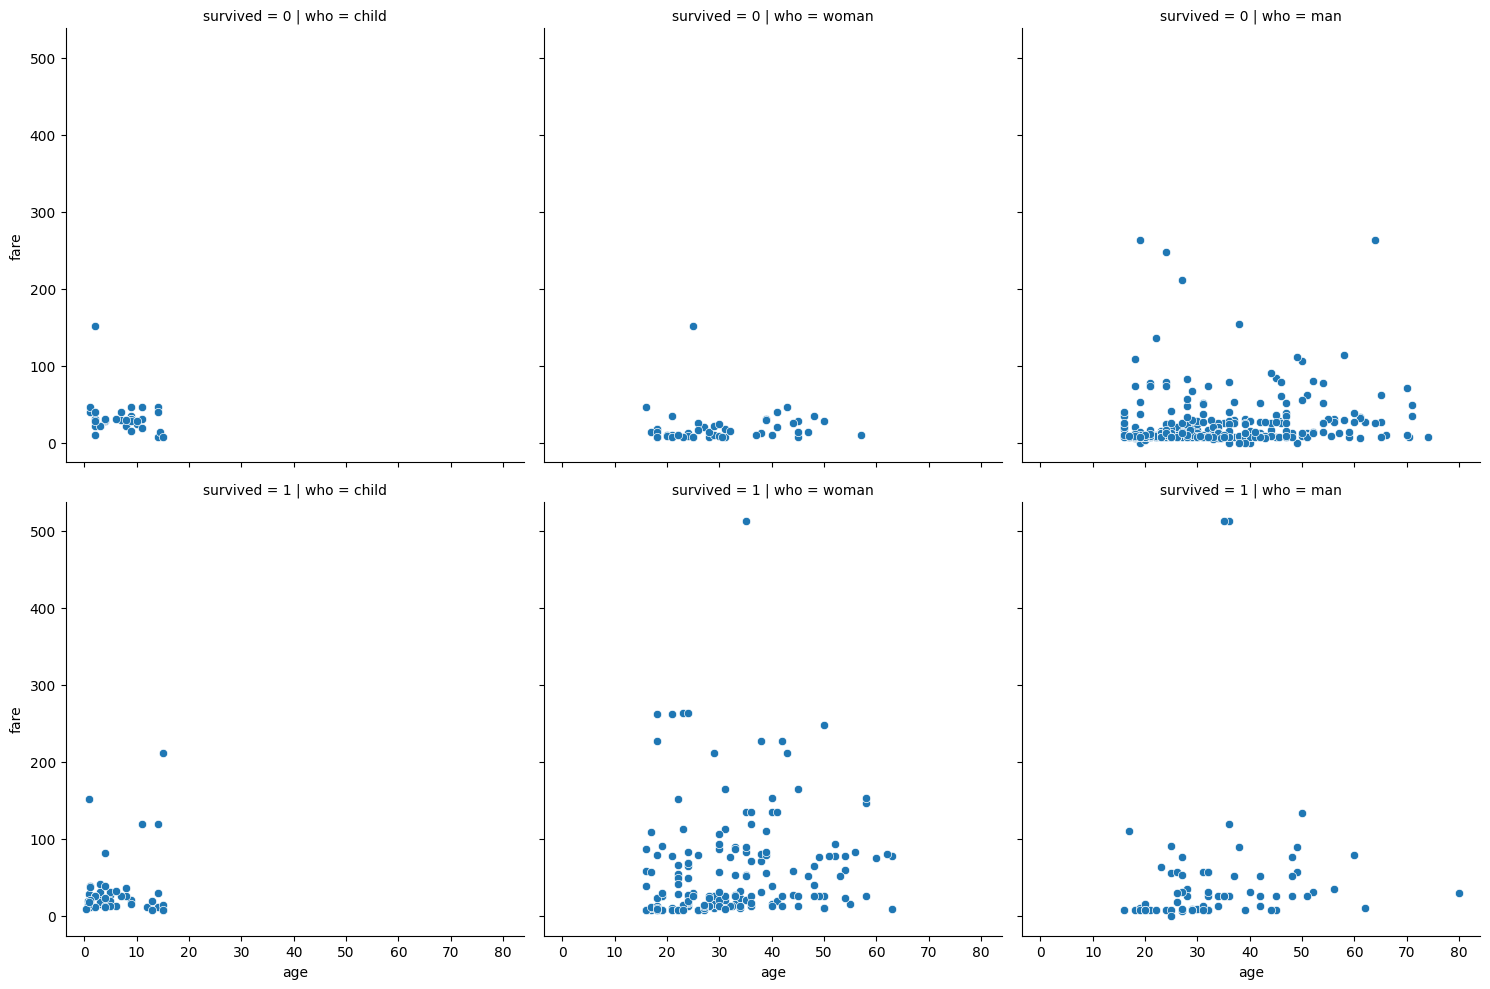

In [ ]:
sns.relplot(x='age', y='fare', 
            data=titanic, 
            kind='scatter',
            col='who',
            col_order=['child', 'woman', 'man'],
            row='survived', # It will arrange plots in a row
            row_order=[0,1]
            )

# Show plot
plt.show()

## Points size and style

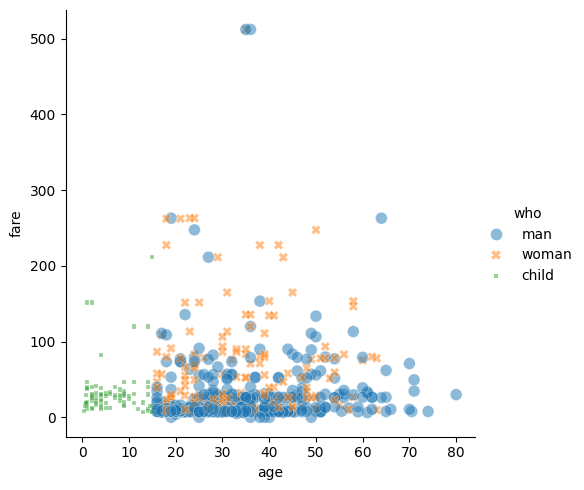

In [37]:
sns.relplot(x='age', y='fare', 
            data=titanic, 
            kind='scatter',
            hue='who', # Color points based on 'who'
            size='who', # Size of points based on 'who'
            style='who', # Different styles for 'who'.
            alpha=0.5,  # Set transparency
            )

# Show plot
plt.show()

## Line Plots

In [54]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

flights = pd.read_csv('../00_datasets/flights.csv')
for label, row in flights.iterrows():
    if row['month'] in ['February', 'March']:
        # create and add season column value to flight
        flights.loc[label, 'season'] = 'Spring'
        
    elif row['month'] in ['April', 'May', 'June', 'July', 'August']:
        flights.loc[label, 'season'] = 'Summer'
    elif row['month'] in ['September', 'October']:
        flights.loc[label, 'season'] = 'Fall'
    else:
        flights.loc[label, 'season'] = 'Winter'

flights.head()

,year,month,passengers,season
0,1949,January,112,Winter
1,1949,February,118,Spring
2,1949,March,132,Spring
3,1949,April,129,Summer
4,1949,May,121,Summer


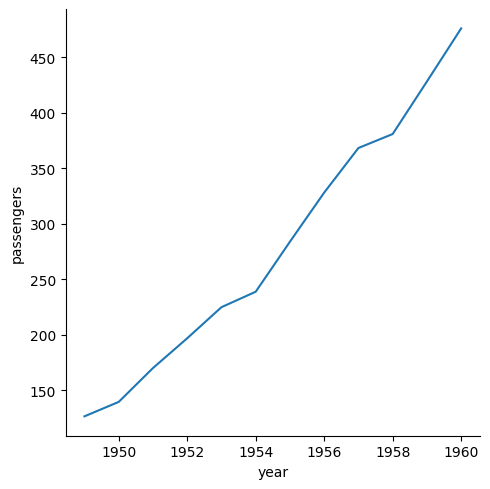

In [ ]:
# Create line plot without error bar
sns.relplot(x='year', y='passengers', 
            data=flights, 
            kind='line',
            errorbar=None
            )

plt.show()

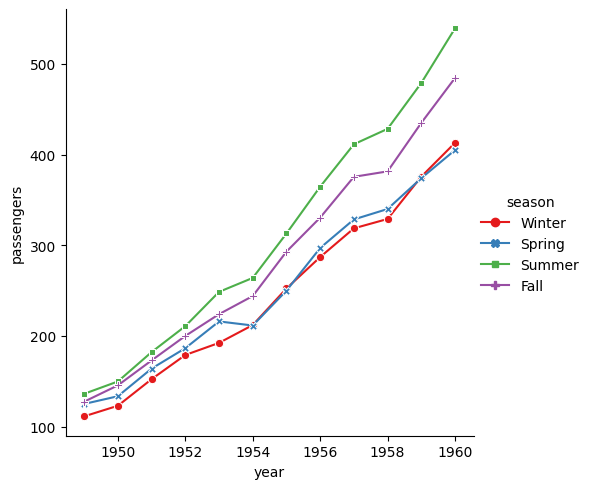

In [ ]:
# Create line plots for different seasons 
sns.relplot(x='year', y='passengers', 
            data=flights, 
            kind='line',
            errorbar=None,  # Disable error bars / hide confidence interval
            hue='season',  # Color lines by season
            style='season',  # Different line styles for each season
            palette='Set1',  # Use a predefined color palette
            markers=True,  # Use markers for each data point
            dashes=False,  # Use solid lines. don't use dashes which style param added by default
            )

plt.show()

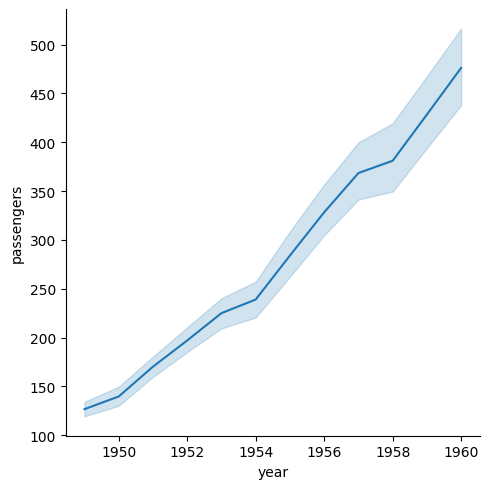

In [ ]:
# Create line plot with confidence intervals as shaded region
# shaded region represents 95% confidence interval
sns.relplot(x='year', y='passengers', 
            data=flights, 
            kind='line',
            # errorbar=None,  # Disable error bars / hide confidence interval
            )

plt.show()

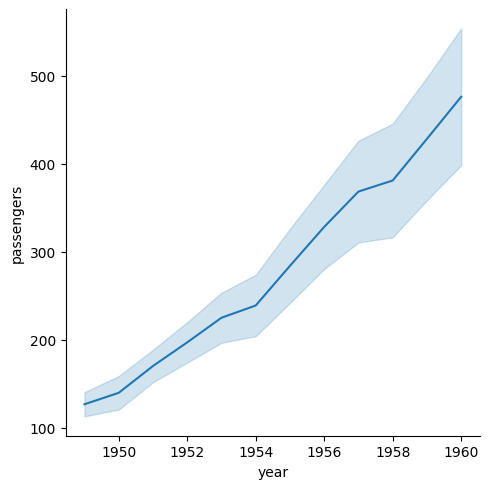

In [69]:
# Create line plot with standard deviation as confidence interval
sns.relplot(x='year', y='passengers', 
            data=flights, 
            kind='line',
            errorbar='sd' # Show standard deviation as error bars
            )

plt.show()

# Categorical plots (Sub plots)

- For categorical data
- Plots exists here: 'bar', 'count', 'box', 'strip', 'swarm', 'violin', 'boxen', 'point'
- It return's FacetGrid type

`It could also be implemented using Facet. if col or row param is used`

## Count Plot

<class 'seaborn.axisgrid.FacetGrid'>


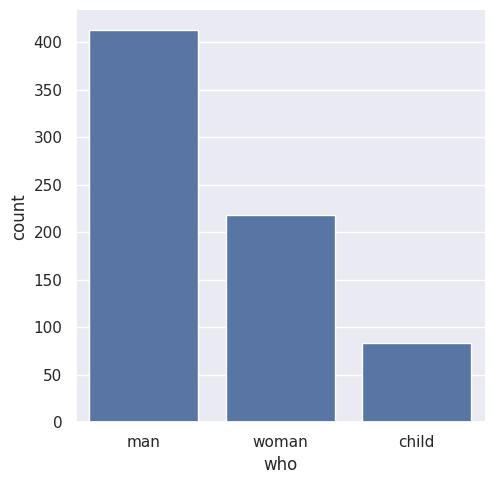

In [167]:
g = sns.catplot(x="who", data=titanic, kind='count')
print(type(g))  # g is a FacetGrid object
plt.show()

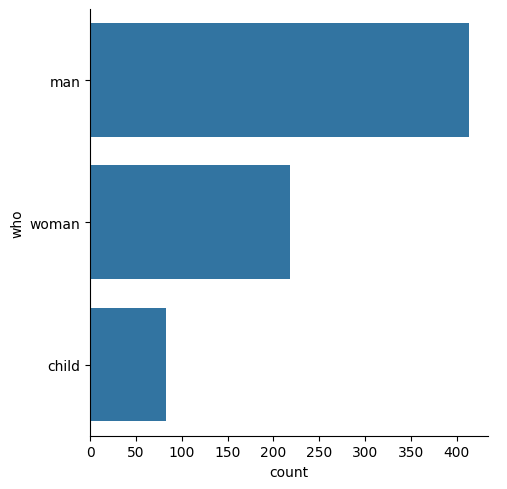

In [74]:
sns.catplot(y="who", data=titanic, kind='count')
plt.show()

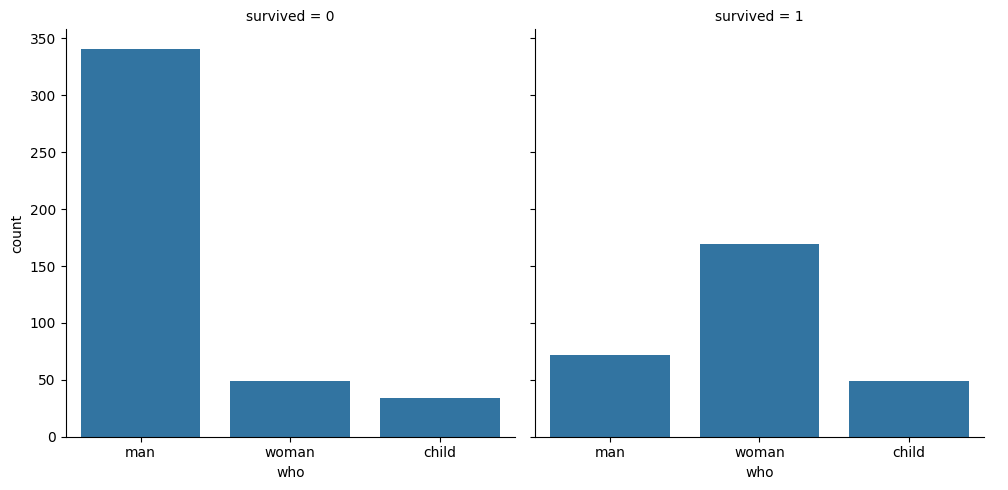

In [ ]:
sns.catplot(x="who", data=titanic, kind='count',
            col='survived',  # Create separate plots for each 'survived' category
            # col_order=[1, 0],  # Order of 'survived' categories
            # hue='survived',
            )
plt.show()

## Bar plot

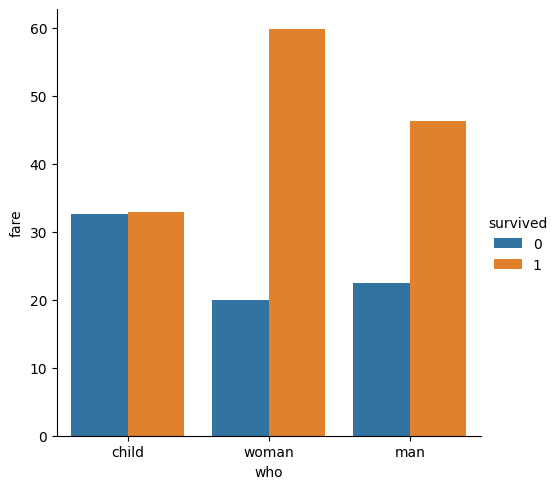

In [131]:
category_order = ["child", 
                  "woman", 
                  "man"]

sns.catplot(x="who", y='fare', data=titanic, kind='bar', 
            order=category_order,
            hue='survived',  # Color bars by 'survived'
            errorbar=None # if its commented, then error bars will be shown by default (95% confidence interval)
            # errorbar='sd',  # Show standard deviation as error bars
            )

## Box Plot

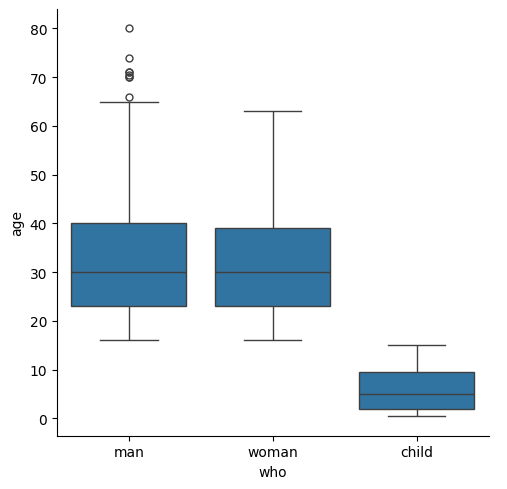

In [ ]:
sns.catplot(data=titanic, x='who', y='fare', kind='box')

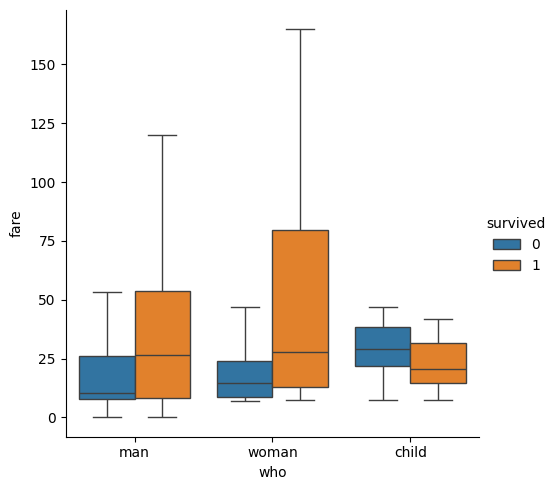

In [111]:
sns.catplot(data=titanic, x='who', y='fare', kind='box', 
            hue='survived', # Color boxes by 'survived'
            showfliers=False, # remove outliers
            )

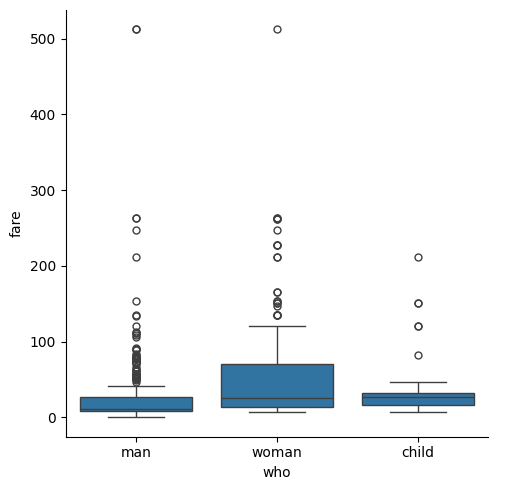

In [ ]:
sns.catplot(data=titanic, x='who', y='fare', kind='box', 
            whis=1.0, # Whiskers - default value is 1.5, which is the IQR rule i.e; 1.5 * IQR above the third quartile and below the first quartile.
            # whis=[5, 95], # Whiskers - set to 5th and 95th percentiles
            # whis=[0, 100], # Whiskers - set to min and max value
            )

## Point Plot

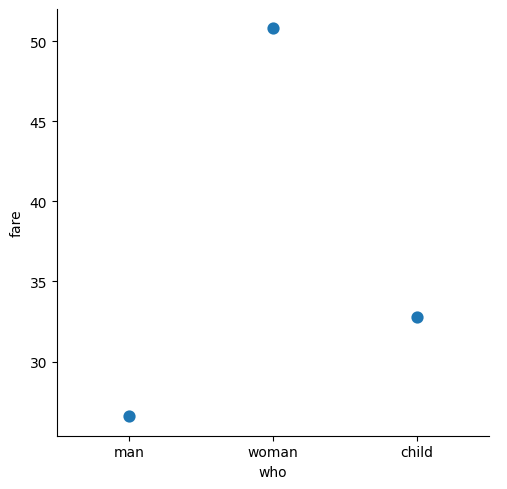

In [ ]:
sns.catplot(data=titanic, x='who', y='fare', kind='point',
            errorbar=None, # Disable error bars
            linestyle='none' # Disable lines connecting points
            )

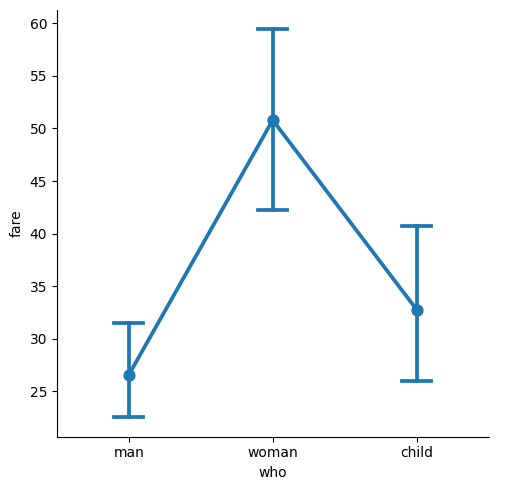

In [143]:
sns.catplot(data=titanic, x='who', y='fare', kind='point',
            capsize=0.2,  # Size of the caps on the error bars
            )

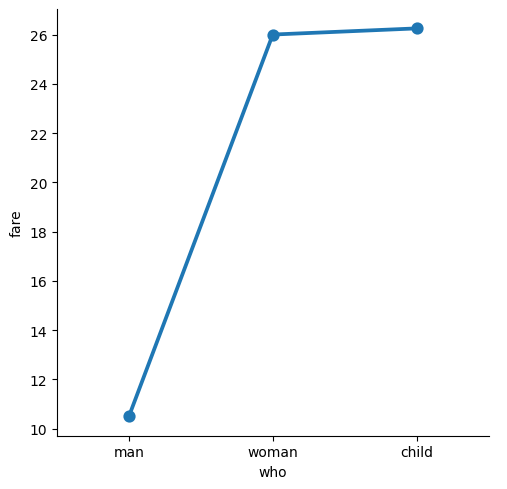

In [144]:
import numpy as np

sns.catplot(data=titanic, x='who', y='fare', kind='point',
            errorbar=None,
            estimator=np.median
            )

# Customize Plots

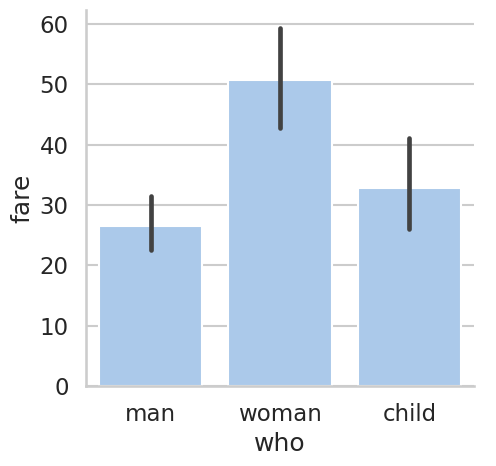

In [ ]:
sns.set_style("whitegrid")  # whitegrid, darkgrid, white, dark, ticks
sns.set_context("talk")  # paper, notebook, talk, poster - default is notebook
sns.set_palette('pastel')

sns.catplot(x="who", y='fare', data=titanic, kind='bar')


## Add title to catplot / relplot

Text(0.5, 1.05, 'Average Fare by Passenger Category')

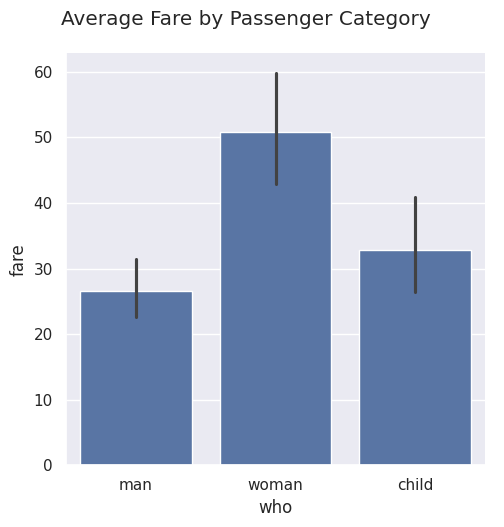

In [203]:
sns.set_theme()  # Reset to default settings

g = sns.catplot(x="who", y='fare', data=titanic, kind='bar')

g.figure.suptitle("Average Fare by Passenger Category",
                #   fontsize=16,  # Title font size 
                  y=1.05,  # Adjust title position - default is 0.98
                  ) 

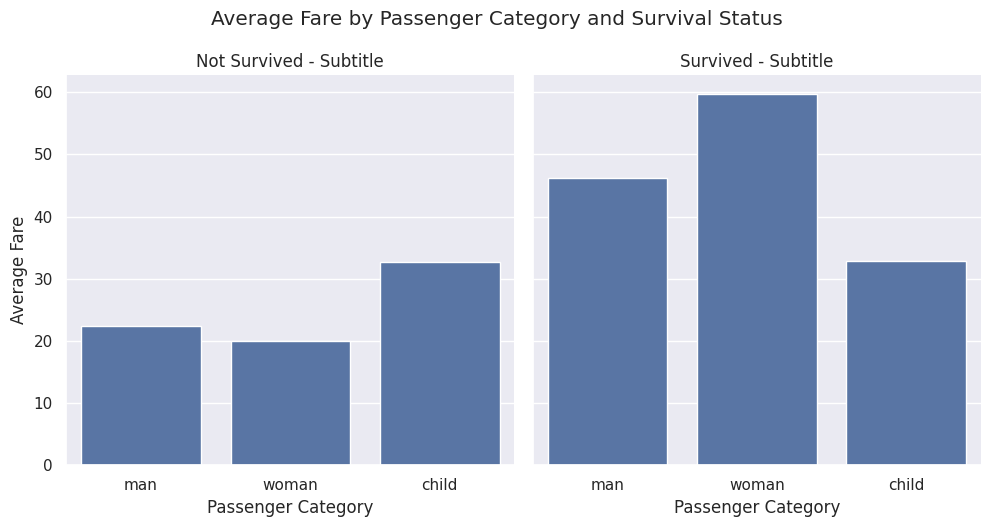

In [229]:
sns.set_theme()  # Reset to default settings

titanic["survived_label"] = titanic["survived"].map({0: "Not Survived", 1: "Survived"})

g = sns.catplot(x="who", y='fare', data=titanic, kind='bar', col='survived_label', errorbar=None)

g.figure.suptitle("Average Fare by Passenger Category and Survival Status",
                #   fontsize=16,  # Title font size 
                  y=1.05,  # Adjust title position - default is 0.98
                  ) 

g.set_titles(col_template="{col_name} - Subtitle")  # Set titles for each subplot

g.set_axis_labels("Passenger Category", "Average Fare")  # Set axis labels for all subplots